# Linear Regression Analysis on Ames Housing Dataset

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Load and Explore the Data

In [7]:
# ames_df.rename(columns={'salePrice ':'SalePrice'}, inplace=True)

In [8]:
# Load the dataset
ames_df = pd.read_csv('ames.csv')

# Display basic information about the dataset
print("Dataset Shape:", ames_df.shape)
print("\nFirst few rows:")
print(ames_df.head())
print("\nDataset Info:")
print(ames_df.info())
print("\nDescriptive Statistics:")
print(ames_df[['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']].describe())

Dataset Shape: (2930, 14)

First few rows:
   Year_Built  Year_Remod_Add  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
0        1960            1960           1080          1656              0   
1        1961            1961            882           896              0   
2        1958            1958           1329          1329              0   
3        1968            1968           2110          2110              0   
4        1997            1998            928           928            701   

   Gr_Liv_Area  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0         1656          1          0              3              1   
1          896          1          0              2              1   
2         1329          1          1              3              1   
3         2110          2          1              3              1   
4         1629          2          1              3              1   

   TotRms_AbvGrd  Fireplaces  Garage_Area  Sale_Price  
0              7 

# Data Cleaning and Preparation

In [9]:
# Check for missing values in our selected columns
print("Missing values in selected columns:")
print(ames_df[['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']].isnull().sum())

# Handle missing values (if any) - in this case, we'll use only complete cases
# For Garage_Area, missing values might indicate no garage, so we could set to 0
ames_df_clean = ames_df[['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']].copy()
ames_df_clean['Garage_Area'] = ames_df_clean['Garage_Area'].fillna(0)

# Check for outliers using z-scores
z_scores = np.abs(stats.zscore(ames_df_clean[['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']]))
ames_df_clean = ames_df_clean[(z_scores < 3).all(axis=1)]

print(f"Dataset size after removing outliers: {ames_df_clean.shape}")

Missing values in selected columns:
Gr_Liv_Area    0
Garage_Area    0
Sale_Price     0
dtype: int64
Dataset size after removing outliers: (2860, 3)


# Exploratory Data Analysis

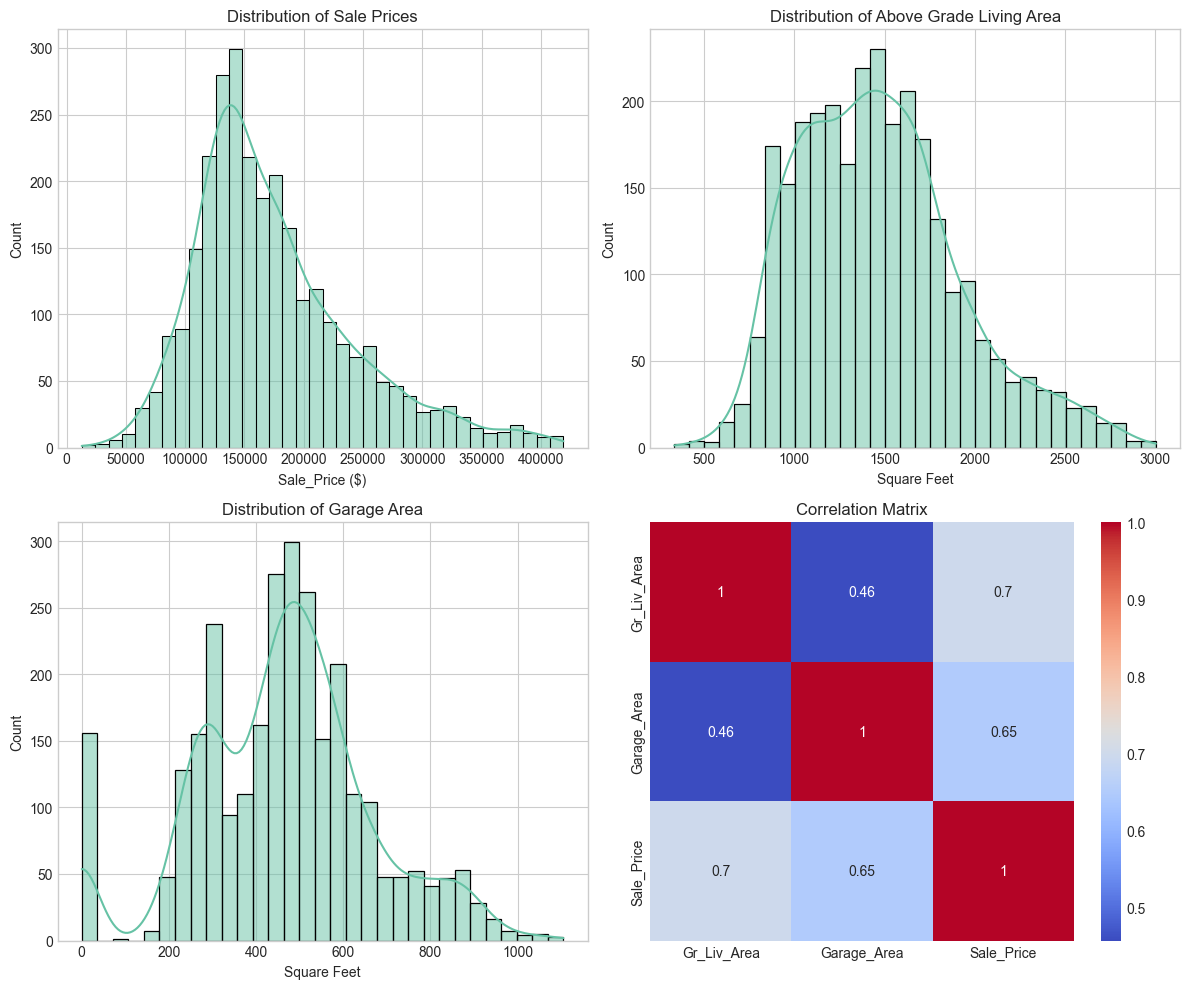

In [10]:
# Create subplots for distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribution of SalePrice
sns.histplot(ames_df_clean['Sale_Price'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Sale Prices')
axes[0, 0].set_xlabel('Sale_Price ($)')

# Distribution of Gr_Liv_Area
sns.histplot(ames_df_clean['Gr_Liv_Area'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Above Grade Living Area')
axes[0, 1].set_xlabel('Square Feet')

# Distribution of Garage_Area
sns.histplot(ames_df_clean['Garage_Area'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Garage Area')
axes[1, 0].set_xlabel('Square Feet')

# Correlation heatmap
corr_matrix = ames_df_clean.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Matrix')

plt.tight_layout()
plt.savefig('distributions_and_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

# Relationship Visualization

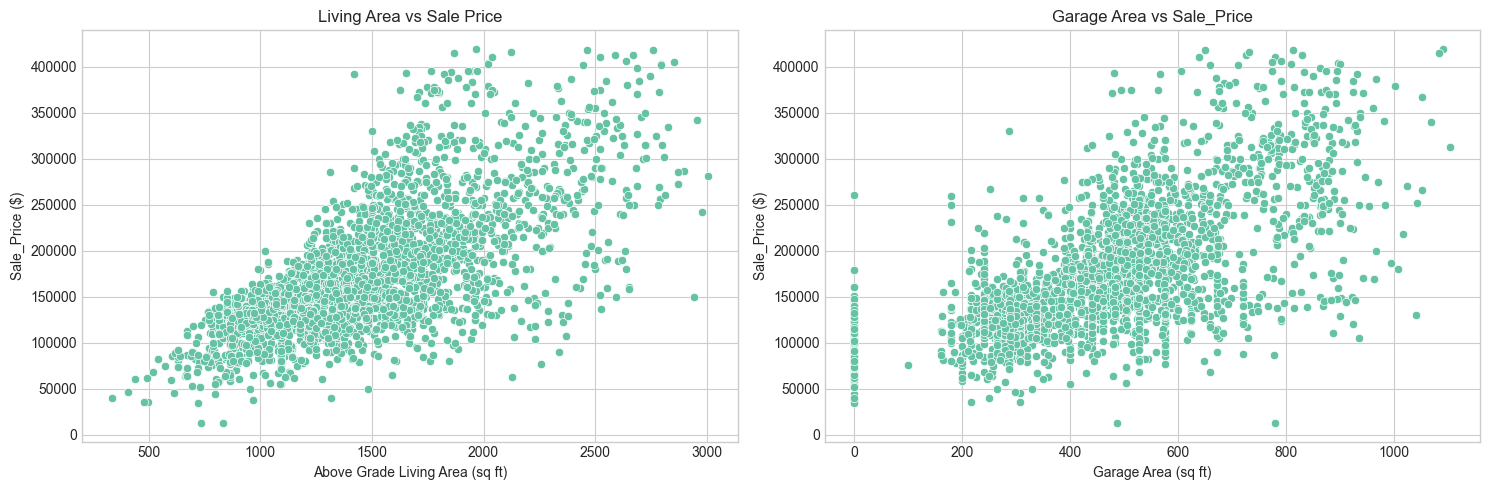

In [11]:
# Create scatter plots to visualize relationships
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gr_Liv_Area vs SalePrice
sns.scatterplot(x='Gr_Liv_Area', y='Sale_Price', data=ames_df_clean, ax=axes[0])
axes[0].set_title('Living Area vs Sale Price')
axes[0].set_xlabel('Above Grade Living Area (sq ft)')
axes[0].set_ylabel('Sale_Price ($)')

# Garage_Area vs SalePrice
sns.scatterplot(x='Garage_Area', y='Sale_Price', data=ames_df_clean, ax=axes[1])
axes[1].set_title('Garage Area vs Sale_Price')
axes[1].set_xlabel('Garage Area (sq ft)')
axes[1].set_ylabel('Sale_Price ($)')

plt.tight_layout()
plt.savefig('feature_relationships.png', dpi=300, bbox_inches='tight')
plt.show()

# Prepare Data for Modeling

In [12]:
# Define independent and dependent variables
X = ames_df_clean[['Gr_Liv_Area', 'Garage_Area']]
y = ames_df_clean['Sale_Price']

# Split the data into training and test sets (75:25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 2145
Test set size: 715


# Build and Train the Model

In [13]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("Model Intercept:", model.intercept_)
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

Model Intercept: -5353.9621041188075
Model Coefficients:
Gr_Liv_Area: 80.06
Garage_Area: 134.95


# Make Predictions and Evaluate Model

In [14]:
# Generate predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate R-squared
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared:.4f}")

Mean Squared Error (MSE): 1634729122.99
Root Mean Squared Error (RMSE): 40431.78
R-squared: 0.6372


In [15]:
print("Model Intercept:", model.intercept_)
print("Model Coefficients:", model.coef_)

# Interpret coefficients in the context of median values
median_Gr_Liv_Area = X_train['Gr_Liv_Area'].median()
median_Garage_Area = X_train['Garage_Area'].median()

# Calculate the predicted price for a house at median values
predicted_median_price = model.intercept_ + \
                         model.coef_[0] * median_Gr_Liv_Area + \
                         model.coef_[1] * median_Garage_Area

print(f"\nFor a house with median Gr_Liv_Area ({median_Gr_Liv_Area} sq ft) and median Garage_Area ({median_Garage_Area} sq ft), the predicted sale price is ${predicted_median_price:,.2f}.")
print(f"• Each additional square foot of living area adds approximately ${model.coef_[0]:.2f} to the sale price.")
print(f"• Each additional square foot of garage area adds approximately ${model.coef_[1]:.2f} to the sale price.")

Model Intercept: -5353.9621041188075
Model Coefficients: [ 80.06367699 134.94987486]

For a house with median Gr_Liv_Area (1424.0 sq ft) and median Garage_Area (478.0 sq ft), the predicted sale price is $173,162.75.
• Each additional square foot of living area adds approximately $80.06 to the sale price.
• Each additional square foot of garage area adds approximately $134.95 to the sale price.


# Create Error Plot

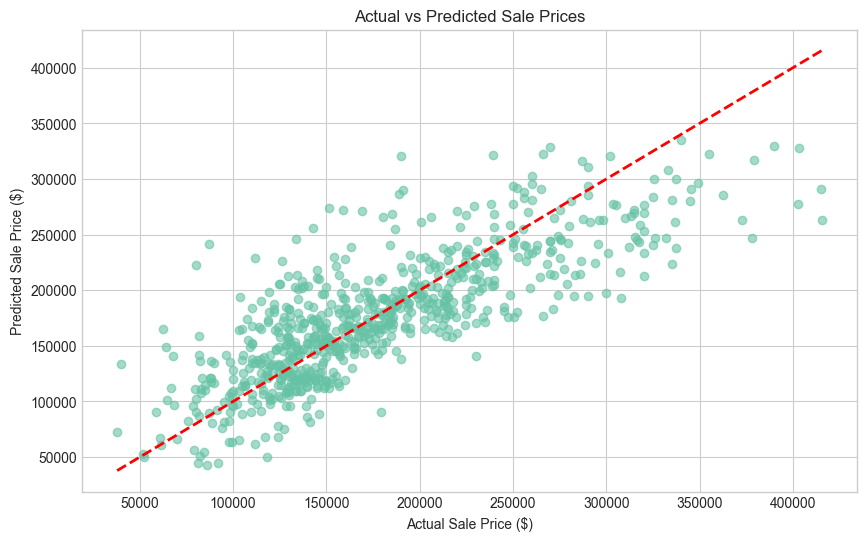

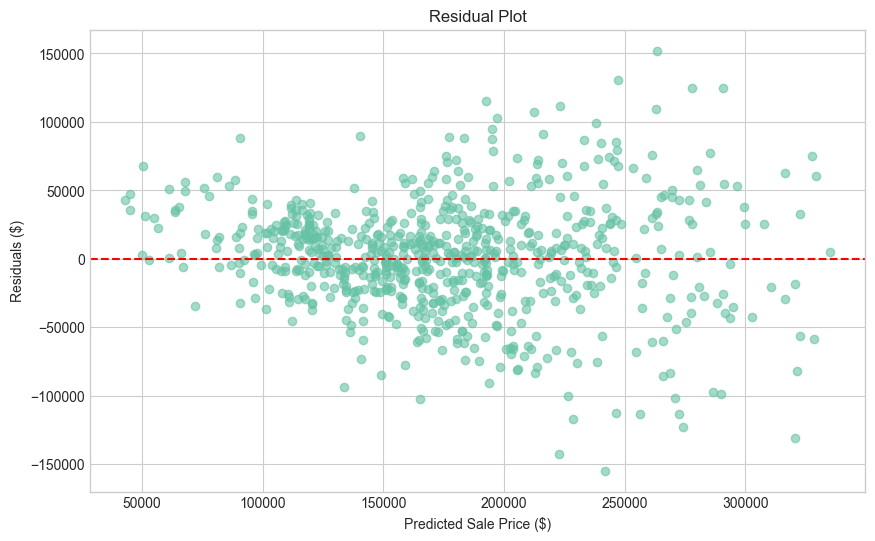

In [16]:
# Create error plot (predicted vs actual values)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)')
plt.title('Actual vs Predicted Sale Prices')
plt.savefig('error_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Create residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sale Price ($)')
plt.ylabel('Residuals ($)')
plt.title('Residual Plot')
plt.savefig('residual_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Interpretation and Summary

In [17]:
# Interpretation of coefficients
print("INTERPRETATION OF COEFFICIENTS:")
print(f"Intercept: ${model.intercept_:.2f}")
print("This is the baseline price when both living area and garage area are zero.")
print(f"Gr_Liv_Area coefficient: ${model.coef_[0]:.2f}")
print("For each additional square foot of above grade living area, the price increases by this amount, holding garage area constant.")
print(f"Garage_Area coefficient: ${model.coef_[1]:.2f}")
print("For each additional square foot of garage area, the price increases by this amount, holding living area constant.")

# Summary of findings
print("\nSUMMARY OF FINDINGS:")
print("1. The model explains {:.2f}% of the variance in house prices.".format(r_squared * 100))
print("2. Both living area and garage area have positive relationships with sale price.")
print("3. The RMSE of ${:,.2f} indicates the typical prediction error.".format(rmse))
print("4. The error plot shows that predictions are generally close to the actual values,")
print("   though there is some spread, especially at higher price points.")
print("5. The residual plot shows a random pattern, suggesting the model is appropriate.")

INTERPRETATION OF COEFFICIENTS:
Intercept: $-5353.96
This is the baseline price when both living area and garage area are zero.
Gr_Liv_Area coefficient: $80.06
For each additional square foot of above grade living area, the price increases by this amount, holding garage area constant.
Garage_Area coefficient: $134.95
For each additional square foot of garage area, the price increases by this amount, holding living area constant.

SUMMARY OF FINDINGS:
1. The model explains 63.72% of the variance in house prices.
2. Both living area and garage area have positive relationships with sale price.
3. The RMSE of $40,431.78 indicates the typical prediction error.
4. The error plot shows that predictions are generally close to the actual values,
   though there is some spread, especially at higher price points.
5. The residual plot shows a random pattern, suggesting the model is appropriate.


# Recommendations

In [ ]:
print("RECOMMENDATIONS FOR REAL ESTATE STRATEGY:")
print("1. Focus on properties with larger above-grade living areas as they command higher prices.")
print("2. Garage space adds significant value to properties - highlight this feature in listings.")
print("3. When pricing similar properties, use the model coefficients as a guideline:")
print(f"   - Each square foot of living area adds approximately ${model.coef_[0]:.2f}")
print(f"   - Each square foot of garage area adds approximately ${model.coef_[1]:.2f}")
print("4. Consider that the model has limitations and other factors (location, condition, etc.)")
print("   also influence prices significantly.")